In [2]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m '4.4.1까지'
# !git push

!pip install -Uqq fastbook

import fastbook
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_139.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_2.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_23.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_164.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_33.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_145.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_165.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_97.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_142.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_90.jpg')...]

In [7]:
frame = (path/'images').ls()[0]
frame

Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_139.jpg')

In [8]:
re.findall(r'(.+)_\d+.jpg$', frame.name)

['american_bulldog']

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/'images')
dls

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


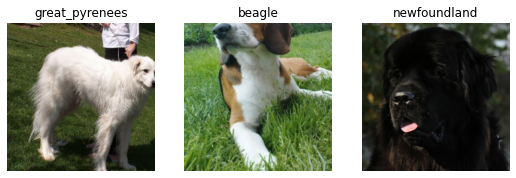

In [10]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_128.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=333x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_128.jpg
    applying partial gives
      staffordshire_bull_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(34)

Final sample: (PILImage mode=RGB size=333x500, TensorCategory(34))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 's

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.509623,0.307863,0.094046,01:59


epoch,train_loss,valid_loss,error_rate,time
0,0.508603,0.344013,0.103518,02:32


In [ ]:
x, y = dls.one_batch()
y

In [ ]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

In [ ]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

In [ ]:
plot_function(torch.sigmoid, min=-4, max=4)